Considere la siguiente función:
$$
    f(x) = exp(x) − x^x,
$$

la cual tiene una raíz en $x = exp(1)$, el número de Euler, o simplemente e. Al evaluar $f(e)$ obtenemos $exp(e) − exp(e) = 0$.
Note que usaremos $exp$, $exp(1)$ y e para denotar a la constante de Euler, que es aproximadamente:
$$
    exp(1) = 2.71828182845904523536028747135266249775724709369995957496696762772407 \dots
$$

Claramente podemos notar que $exp(x) \geq x^2$  para  $x \in ]0, e]$, y $x^x \geq exp(x)$ para $x \in [e, \infty[$. Ahora, queremos estudiar
como se modifica la raíz de $f(x)$ cuando le agregamos una constante $\delta$, es decir, queremos cuantificar numéricamente que
le ocurre a la raíz de la siguiente función:

$$
    f_\delta(x) = f(x) + \delta = exp(x) − x^x + \delta
$$

Donde denotamos la raíz de $f_\delta(x)$ como $r(\delta)$. En particular conocemos que $r(0) = e$, i.e. la raíz de la función original. En
cambio cuando $\delta$ es distinto a 0, su raíz cambia. Por simplicidad considere que $\delta > 0$.


#### 1. Proponga un algoritmo, que tenga convergencia lineal, para obtener la raíz de $f_\delta(x)$. El input del algoritmo debe ser $\delta$ y el output la raíz obtenida. Usted debe determinar el número de iteraciones o error para obtener una aproximación razonable. El algoritmo debe tener definido completamente todos los parámetros extras para su ejecución.

Para poder encontrar raizes de $f_\delta(x)$ utilizaremos una iteración de punto fijo, del siguiente modo:
$$
    x_1 = exp(1)\\
    x_{i} = (exp(x_{i-1})+delta)^{\frac{1}{x_{i-1}}}
$$

Se iterara hasta que el error sea menor a $1e-8$ o hasta que se cumplan 500 iteraciones, si es que se quiere estos parámetros pueden ser modificados.

#### 2. Proponga un algoritmo, que tenga convergencia superior a lineal, para obtener la raíz de $f_\delta(x)$. El input del algoritmo debe ser $\delta$ y el output la raíz obtenida. Usted debe determinar el número de iteraciones o error para obtener una aproximación razonable. El algoritmo debe tener definido completamente todos los parámetros extras para su ejecución.

Para poder encontrar raizes de $f_\delta(x)$ utilizaremos el método de newton con los siguientes párametros:
$$
    f(1) = exp(1); initial guess\\
    f(x) = exp(x) - x^x + \delta\\
    f'(x) = exp(x) - x^x(ln(x) + 1)
$$

Se iterara hasta que el error sea menor a $1e-8$ o hasta que se cumplan 500 iteraciones, si es que se quiere estos parámetros pueden ser modificados.

#### 3. Implemente alguno de los 2 algoritmos propuestos y ejecútelo para obtener la raíz de $f_{1+j}(x)$, donde $j$ representa el último dígito de su rol.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
def fpi(delta, error=1e-8, ite=500):
    #f = lambda x: (np.exp(x) + delta)**(1/x)
    f = lambda x: 0.5*x+1.5/x
    xs = np.zeros(ite)
    xs[0] = 1
    for i in range(1,ite):
        xs[i] = f(xs[i-1])
        err = abs(xs[i]-xs[i-1])
        if err<error:
            xs = xs[0:i]
            break
    return xs


def newton(delta, ite=500, tol=1e-8):
    #f = lambda x: np.exp(x)-x**x+delta
    #fp = lambda x: np.exp(x)-(x**x)*(np.log(x)+1)
    f = lambda x: x**2-2
    fp = lambda x: 2*x
    x = np.empty(ite + 1)
    x[0] = 1
    for i in range(ite):
        x[i+1] = x[i] - f(x[i]) / fp(x[i])
        if np.abs(x[i+1] - x[i]) < tol or f(x[i+1]) == 0:
            x = x[:i+2]
            break
    return x

In [47]:
fpi(6)[-1], newton(6)

(1.7320508100147274,
 array([1.        , 1.5       , 1.41666667, 1.41421569, 1.41421356,
        1.41421356]))

 #### 4. Grafique la función $r(\delta)$ para $\delta \in [0, 100]$, utilice por lo menos 100 puntos para el plot.

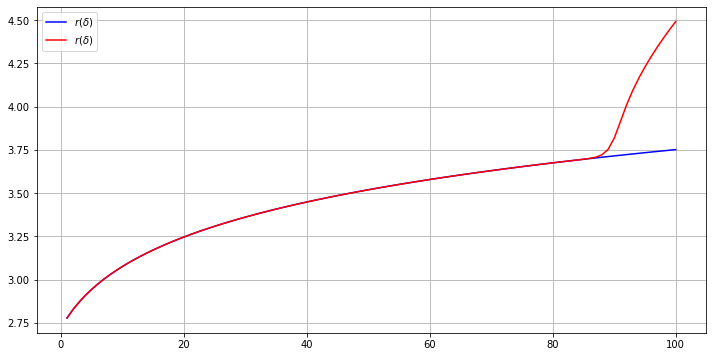

In [42]:
deltas = np.linspace(1,100, 100)
rs = np.zeros(100)
rs_n = np.zeros(100)
for i in range(100):
    rs[i] = fpi(deltas[i])[-1]
    rs_n[i] = newton(deltas[i])[-1]
plt.figure(figsize=(12, 6))
plt.plot(deltas, rs_n, 'b-', label=r"$r(\delta)$")
plt.plot(deltas, rs, 'r-', label=r"$r(\delta)$")
plt.grid(True)
plt.legend()
plt.show()